Importing packages

In [1]:
from scipy import signal
from scipy.signal import chirp, stft
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display

Logarithms Chirp signal

In [2]:
fs = 48000#sampling frequency
T = 2#Duration of signal
t = np.arange(0, int(T*fs)) / fs # logarithmic chirp signal sampled at 48kHz for T seconds
logSignal = chirp(t, f0=20, f1=20000, t1=T, method='logarithmic')# at t=0, f=20 and at t=T, f=20k, varies function logarithmic
ipd.Audio(logSignal, rate=fs)#gives the signal in audio format


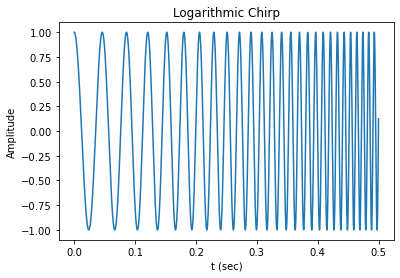

In [3]:
plt.figure()# create a  new fig for the plot
plt.plot(t[:24000],logSignal[:24000])#plot the points where x-axis is time in sec and y-axis is logarithm chirp
plt.title("Logarithmic Chirp")
plt.xlabel('t (sec)')
plt.ylabel('Amplitude')
plt.show()
   

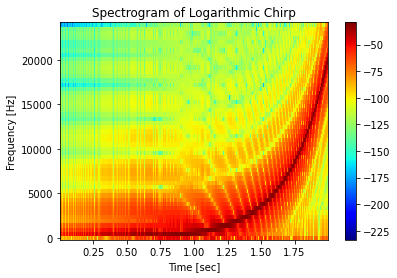

In [4]:
# Compute the spectrogram of the logarithmic chirp signal
f, t, Sxx = signal.spectrogram(logSignal, fs, nperseg=100, noverlap=80, nfft=100)

# Create a new figure for plotting
plt.figure()

# Create a pseudocolor plot of the spectrogram
pcm = plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='auto', cmap='jet')  # Using 'jet' colormap

# Label the y-axis as Frequency [Hz]
plt.ylabel('Frequency [Hz]')

# Label the x-axis as Time [sec]
plt.xlabel('Time [sec]')

# Set the title of the plot
plt.title('Spectrogram of Logarithmic Chirp')

# Setting properties of the current axes
plt.gca().set_aspect('auto')  # Auto Adjust aspect ratio automatically

# Add a colorbar to the plot
plt.colorbar(pcm)

# Show the plot
plt.show()


Hyperbolic Chirp signal

In [5]:
fs = 48000 #Initalizing all variables 
T = 2
t = np.arange(0, int(T*fs)) / fs # hyperbolic chirp signal sampled at 48kHz for T seconds
hyperbolicSignal = chirp(t, f0=500, f1=20000, t1=T, method='hyperbolic')
ipd.Audio(hyperbolicSignal, rate=fs)


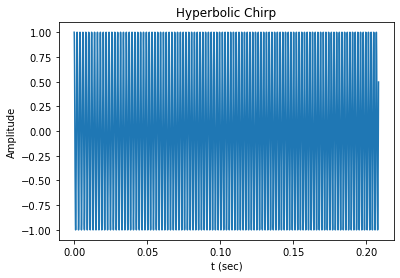

In [6]:
plt.figure()
plt.plot(t[0:10000],hyperbolicSignal[0:10000])
plt.title("Hyperbolic Chirp")
plt.xlabel('t (sec)')
plt.ylabel('Amplitude')
plt.show()

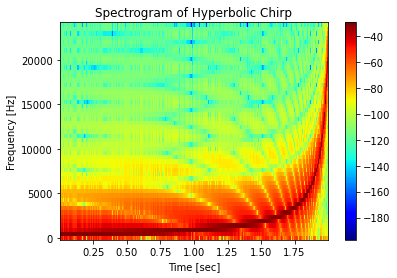

In [7]:
# Compute the spectrogram of the Hyperbolic chirp signal
f, t, Sxx = signal.spectrogram(hyperbolicSignal, fs, nperseg=100, noverlap=80, nfft=100)

# Create a new figure for plotting
plt.figure()

# Create a pseudocolor plot of the spectrogram
pcm = plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='auto', cmap='jet')  # Using 'jet' colormap

# Label the y-axis as Frequency [Hz]
plt.ylabel('Frequency [Hz]')

# Label the x-axis as Time [sec]
plt.xlabel('Time [sec]')

# Set the title of the plot
plt.title('Spectrogram of Hyperbolic Chirp')

# Setting properties of the current axes
plt.gca().set_aspect('auto')  # Adjust aspect ratio automatically

# Add a colorbar to the plot
plt.colorbar(pcm)

# Show the plot
plt.show()


Linear Chirp Signal

In [8]:
T=2
fs=48000
t = np.arange(0, int(T*fs)) / fs 
LinearSignal = chirp(t, f0=5, f1=20000, t1=T, method='linear')
ipd.Audio(LinearSignal, rate=fs)

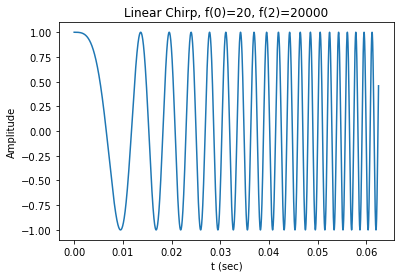

In [9]:
plt.plot(t[0:3000], LinearSignal[0:3000])
plt.title("Linear Chirp, f(0)=20, f(2)=20000")
plt.xlabel('t (sec)')
plt.ylabel('Amplitude')
plt.show()

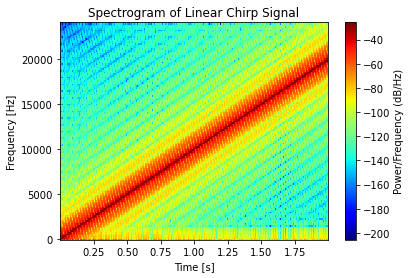

In [10]:
frequencies, times, Sxx = signal.spectrogram(LinearSignal, fs)
plt.figure()
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='jet')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title('Spectrogram of Linear Chirp Signal')
plt.show()

Synthetic Chirp Signal

In [11]:
T=2
fs=48000
f1=36000
f0=30
t = np.arange(0, int(T*fs)) / fs 
myChirp = np.cos(2 * np.pi * t * (f0 + (f1 - f0) * t**2 / (3 * T**2)))
ipd.Audio(myChirp, rate=fs)

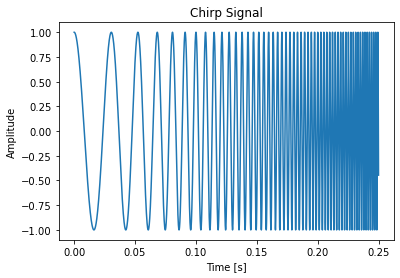

In [12]:
plt.plot(t[0:12000], myChirp[0:12000])
plt.title('Chirp Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

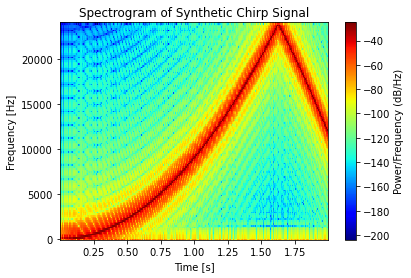

In [13]:
frequencies, times, Sxx = signal.spectrogram(myChirp, fs)
plt.figure()
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='jet')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title('Spectrogram of Synthetic Chirp Signal')
plt.show()